## support vector regressor 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from mpl_toolkits import mplot3d
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from sklearn.svm import SVR
import seaborn as sns

In [67]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # always while doing the SVR do the satndard scaling  

In [68]:
SVR


sklearn.svm._classes.SVR

In [80]:
data = pd.read_csv("https://raw.githubusercontent.com/NikhilKumarMutyala/Linear-Regression-from-scartch-on-KC-House-Dataset/master/kc_house_data.csv")

In [81]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [82]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [83]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [84]:
data.duplicated().sum()

0

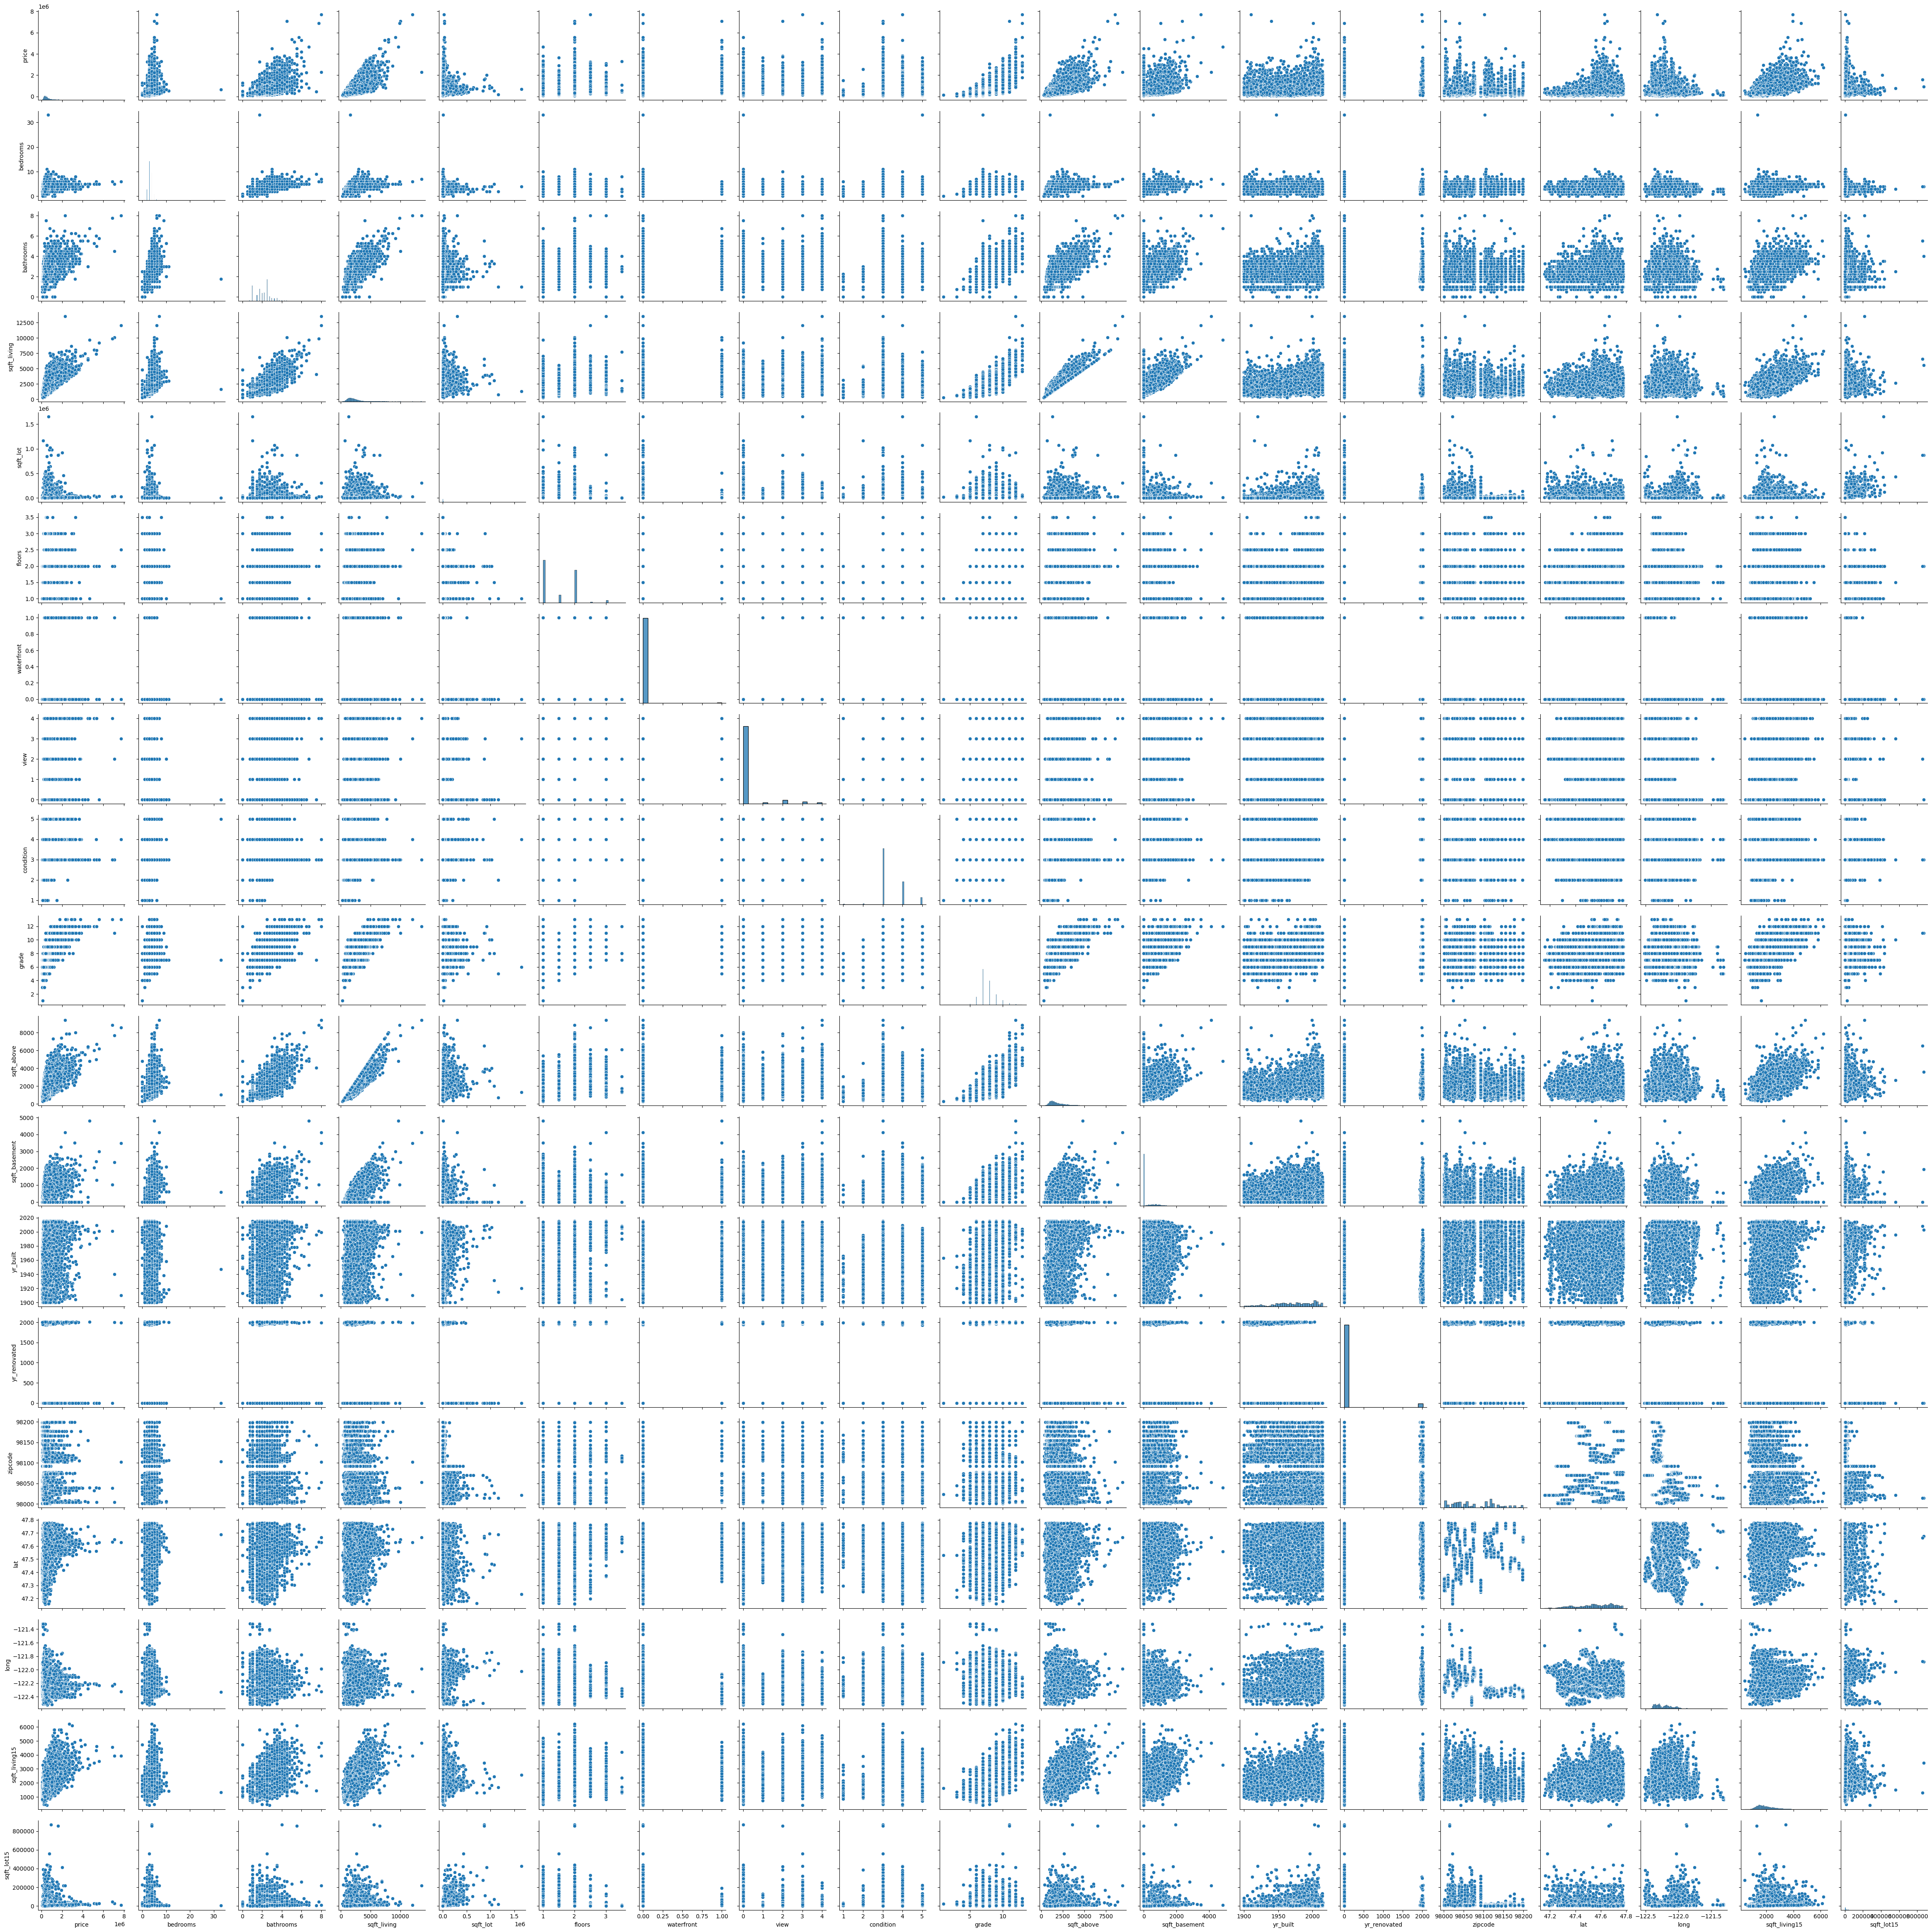

In [54]:
sns.pairplot(data)

In [85]:
x = data.drop("price",axis=1)

In [86]:
x

id             date  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000         3       1.00         1180   
1      6414100192  20141209T000000         3       2.25         2570   
2      5631500400  20150225T000000         2       1.00          770   
3      2487200875  20141209T000000         4       3.00         1960   
4      1954400510  20150218T000000         3       2.00         1680   
...           ...              ...       ...        ...          ...   
21608   263000018  20140521T000000         3       2.50         1530   
21609  6600060120  20150223T000000         4       2.50         2310   
21610  1523300141  20140623T000000         2       0.75         1020   
21611   291310100  20150116T000000         3       2.50         1600   
21612  1523300157  20141015T000000         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0           0     0          3      7        1180   
1          7242     2.0           0     0          3      7        2170   
2         10000     1.0           0     0          3      6         770   
3          5000     1.0           0     0          5      7        1050   
4          8080     1.0           0     0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21608      1131     3.0           0     0          3      8        1530   
21609      5813     2.0           0     0          3      8        2310   
21610      1350     2.0           0     0          3      7        1020   
21611      2388     2.0           0     0          3      8        1600   
21612      1076     2.0           0     0          3      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 20 columns]

In [87]:
y = data.price

In [88]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [89]:
x.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [96]:
x = x.drop(["id","date"],axis=1)

In [97]:
x

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00         1180      5650     1.0           0     0   
1             3       2.25         2570      7242     2.0           0     0   
2             2       1.00          770     10000     1.0           0     0   
3             4       3.00         1960      5000     1.0           0     0   
4             3       2.00         1680      8080     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50         1530      1131     3.0           0     0   
21609         4       2.50         2310      5813     2.0           0     0   
21610         2       0.75         1020      1350     2.0           0     0   
21611         3       2.50         1600      2388     2.0           0     0   
21612         2       0.75         1020      1076     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21608          3      8        1530              0      2009             0   
21609          3      8        2310              0      2014             0   
21610          3      7        1020              0      2009             0   
21611          3      8        1600              0      2004             0   
21612          3      7        1020              0      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
0        98178  47.5112 -122.257           1340        5650  
1        98125  47.7210 -122.319           1690        7639  
2        98028  47.7379 -122.233           2720        8062  
3        98136  47.5208 -122.393           1360        5000  
4        98074  47.6168 -122.045           1800        7503  
...        ...      ...      ...            ...         ...  
21608    98103  47.6993 -122.346           1530        1509  
21609    98146  47.5107 -122.362           1830        7200  
21610    98144  47.5944 -122.299           1020        2007  
21611    98027  47.5345 -122.069           1410        1287  
21612    98144  47.5941 -122.299           1020        1357  

[21613 rows x 18 columns]

In [98]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [112]:
x_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
17929         3       3.25         1510      1245     3.0           0     0   
7876          2       2.00         1300      6515     1.0           0     0   
18279         3       1.50         1310      1266     2.0           0     0   
13154         3       2.25         1650      7800     1.0           0     0   
10153         2       2.50         2720     26761     2.0           1     4   
...         ...        ...          ...       ...     ...         ...   ...   
16547         3       1.75         1260      8487     1.0           0     0   
16317         4       2.50         2040      7412     2.0           0     0   
12895         5       2.25         3340     52476     2.0           0     0   
6012          4       2.50         3350      4501     2.0           0     0   
6558          3       2.75         2600      5875     1.5           0     2   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
17929          3      7        1510              0      2007             0   
7876           3      8        1300              0      2005             0   
18279          3      8        1120            190      2002             0   
13154          3      7        1260            390      1969             0   
10153          3      7        2720              0      1990             0   
...          ...    ...         ...            ...       ...           ...   
16547          3      7        1260              0      1970             0   
16317          3      8        2040              0      1988             0   
12895          4      8        3340              0      1975             0   
6012           3      9        2640            710      2002             0   
6558           5      8        1600           1000      1929             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
17929    98133  47.7293 -122.343           1510        1245  
7876     98053  47.7078 -122.013           1640        6009  
18279    98116  47.5663 -122.408           1310        1378  
13154    98011  47.7377 -122.197           1760        8268  
10153    98166  47.4499 -122.376           1870       12396  
...        ...      ...      ...            ...         ...  
16547    98011  47.7664 -122.201           1890       13051  
16317    98074  47.6347 -122.026           2050        7830  
12895    98027  47.4553 -121.987           2460       48351  
6012     98117  47.6880 -122.379           1000        4500  
6558     98116  47.5773 -122.406           2260        5492  

[16209 rows x 18 columns]

In [113]:
x_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
17055         4       2.75         2710     37277     2.0           0     0   
2488          3       2.00         1540      8011     1.0           0     0   
1808          4       3.00         2720    183823     2.0           0     0   
10638         4       2.75         2020      7357     1.0           0     0   
9172          4       3.00         2660      4600     1.5           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
16287         3       2.25         1950      9600     1.0           0     0   
1284          2       1.00          960      6250     1.0           0     0   
12287         4       2.25         2920     20400     1.0           0     0   
1011          3       1.75         2020      8970     1.0           0     0   
17406         4       2.50         2640      3899     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
17055          3      9        2710              0      2000             0   
2488           3      7        1540              0      1988             0   
1808           3      8        2720              0      1975          2007   
10638          3      7        1350            670      1986             0   
9172           3      8        1820            840      1906          2002   
...          ...    ...         ...            ...       ...           ...   
16287          4      7        1200            750      1987             0   
1284           3      6         960              0      1916             0   
12287          4     11        2920              0      1966             0   
1011           4      7        1180            840      1981             0   
17406          3      7        2640              0      2000             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
17055    98027  47.4634 -121.987           2390       39299  
2488     98011  47.7342 -122.202           1630        7141  
1808     98053  47.6749 -122.002           2140      173804  
10638    98034  47.7145 -122.225           1690        7804  
9172     98112  47.6258 -122.305           2350        4600  
...        ...      ...      ...            ...         ...  
16287    98092  47.2762 -122.148           1760        8850  
1284     98136  47.5491 -122.386           1350        6250  
12287    98004  47.6237 -122.228           3080       20400  
1011     98072  47.7571 -122.145           2140        8008  
17406    98011  47.7540 -122.217           2460        4057  

[5404 rows x 18 columns]

In [114]:
y_train

17929    319950.0
7876     439888.0
18279    445000.0
13154    385000.0
10153    985000.0
           ...   
16547    335500.0
16317    545000.0
12895    645000.0
6012     925000.0
6558     805000.0
Name: price, Length: 16209, dtype: float64

In [115]:
y_test

17055     630000.0
2488      425000.0
1808      850000.0
10638     520000.0
9172     1234000.0
           ...    
16287     260000.0
1284      355000.0
12287    1650000.0
1011      475000.0
17406     436000.0
Name: price, Length: 5404, dtype: float64

In [116]:
scaler = StandardScaler()

In [119]:
scaled_data = scaler.fit_transform(x_train)

In [120]:
scaled_testdata = scaler.transform(x_test)

In [123]:
model = SVR()
model.fit(scaled_data,y_train)

SVR()

In [126]:
pred = model.predict(scaled_testdata)

In [128]:
scaled_testdata[0]

array([ 0.67388478,  0.82914541,  0.68897527,  0.52361616,  0.9429523 ,
       -0.08672447, -0.30837498, -0.63277877,  1.14843052,  1.12266957,
       -0.66185815,  0.99193273, -0.21212589, -0.95042079, -0.6960914 ,
        1.60213575,  0.58199178,  1.01544285])

In [127]:
pred

array([451080.57594176, 449815.10348036, 450725.18582671, ...,
       451370.2699882 , 450296.47487154, 451056.8957607 ])

In [129]:
model.predict([[ 0.67388478,  0.82914541,  0.68897527,  0.52361616,  0.9429523 ,
       -0.08672447, -0.30837498, -0.63277877,  1.14843052,  1.12266957,
       -0.66185815,  0.99193273, -0.21212589, -0.95042079, -0.6960914 ,
        1.60213575,  0.58199178,  1.01544285]])

array([451080.57594073])